In [37]:
import sys
sys.path.append('..')
from Inference.script_utils import prepare_model
from csvflowdatamodule.CsvDataset import FilesLoaders

from torchvision.utils import flow_to_image

## Load Model

In [38]:
%%capture
base = '/net/serpico-fs2/emeunier/' # os.environ['Dataria'] 
model_dir = base+'/Models/SegGrOptFlow/'
model_name = 'fullmodel(15vl7in3)'#'zsxucgtk-patched'
model = prepare_model(f'{model_dir}/vir-tempo/{model_name}/').eval();
predictor = model.backbone_model.model.model

## Load Flow File 

In [76]:
pflows = ['../images/blackswan/00000.flo',
          '../images/blackswan/00001.flo',
          '../images/blackswan/00002.flo']

In [77]:
fl = FilesLoaders()
flows = [fl.load_file(pfl, 'Flow', model.hparams['img_size']) for pfl in pflows]

## Prediction using the backbone

In [78]:
logits, auxs = predictor(torch.stack(flows, dim=1)[None])
pred = torch.softmax(logits, axis=1)

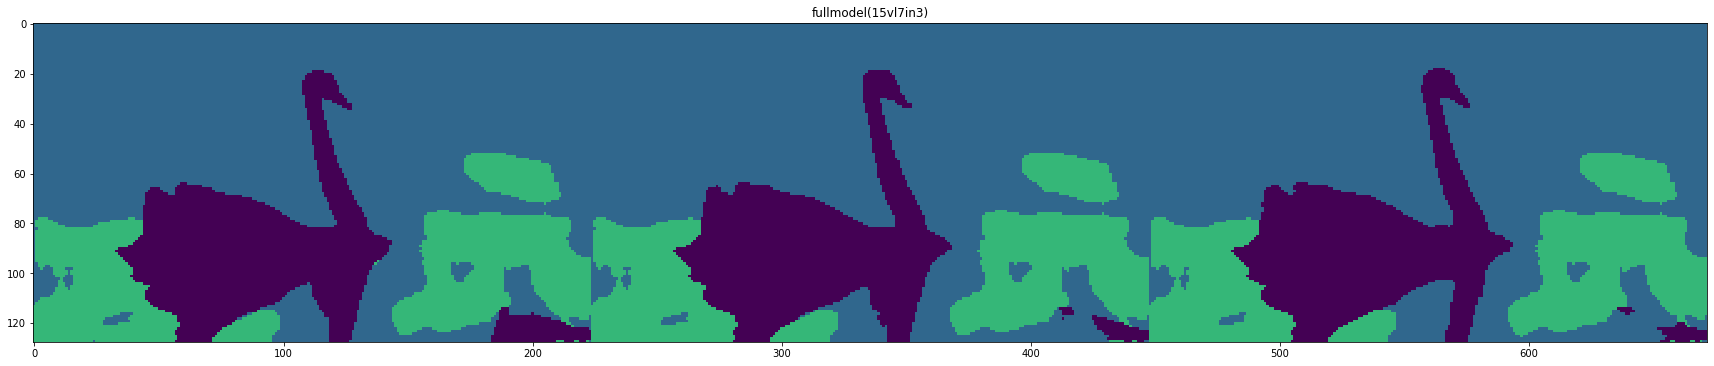

In [79]:
plt.figure(figsize=(30,15))
plt.title(f'{model_name}' )
plt.imshow(einops.rearrange(pred.cpu(), 'b c t i j -> c (b i) (t j)').argmax(0).detach(),
           interpolation='none', vmax=3)
plt.show() 